## Let's visualize the heatmap results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w435", "Trihydrochloride", "Blues"),
    pivot_value="pixel_mean",
    row_lookup={
        "A": "Full control",
        "B": "Perm. control",
        "C": "Triton 1%",
        "D": "Triton 2%",
        "E": "Triton 5%",
        "F": "Triton 10%",
        "G": "EtOH 70%",
        "H": "EtOH 100%",
    },
    column_lookup={
        "1_": "Full control",
        "2_": "Fix. control",
        "3_": "Form. 0.01%",
        "4_": "Form. 0.05%",
        "5_": "Form. 0.1%",
        "6_": "Form. 1%",
        "7_": "MetOH+Ace. 50%",
        "8_": "MetOH+Ace. 100%",
        "9_": "MetOH 50%",
        "10": "MetOH 100%",
        "11": "Acetone 50%",
        "12": "Acetone 100%",
    },
):
    df = pd.read_csv(experiment_results)
    df = df[df["filename"].str.contains(color_channel[0])]
    df["Permeabilization Agent"] = df["filename"].apply(lambda x: row_lookup[x[0]])
    df["Fixation Agent"] = df["filename"].apply(lambda x: column_lookup[x[1:3]])
    df = df.pivot(
        index="Permeabilization Agent", columns="Fixation Agent", values=pivot_value
    )
    df.index = pd.CategoricalIndex(df.index, categories= row_lookup.values())
    df.sort_index(level=0, inplace=True)
    df = df[column_lookup.values()]


    plt.figure(figsize=(12, 8))
    heatmap = sns.heatmap(
        df,
        cmap=color_channel[2],
    )
    heatmap.set_title(f"{color_channel[1]} heatmap of {experiment_results}")
    plt.show()

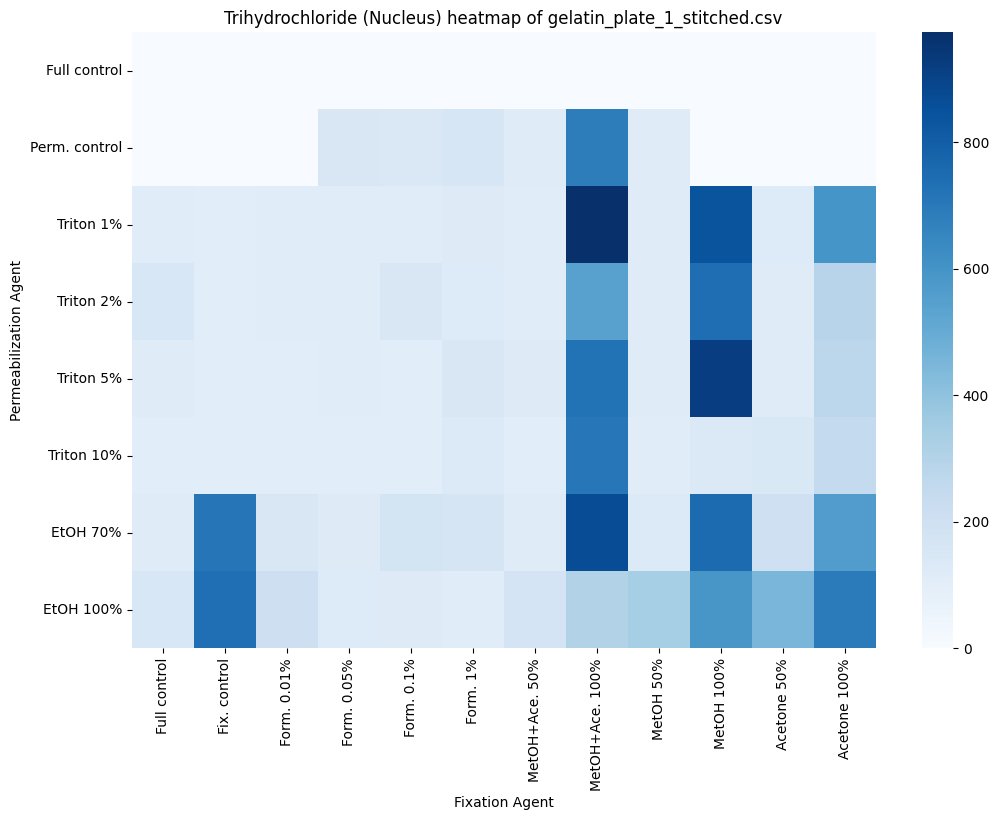

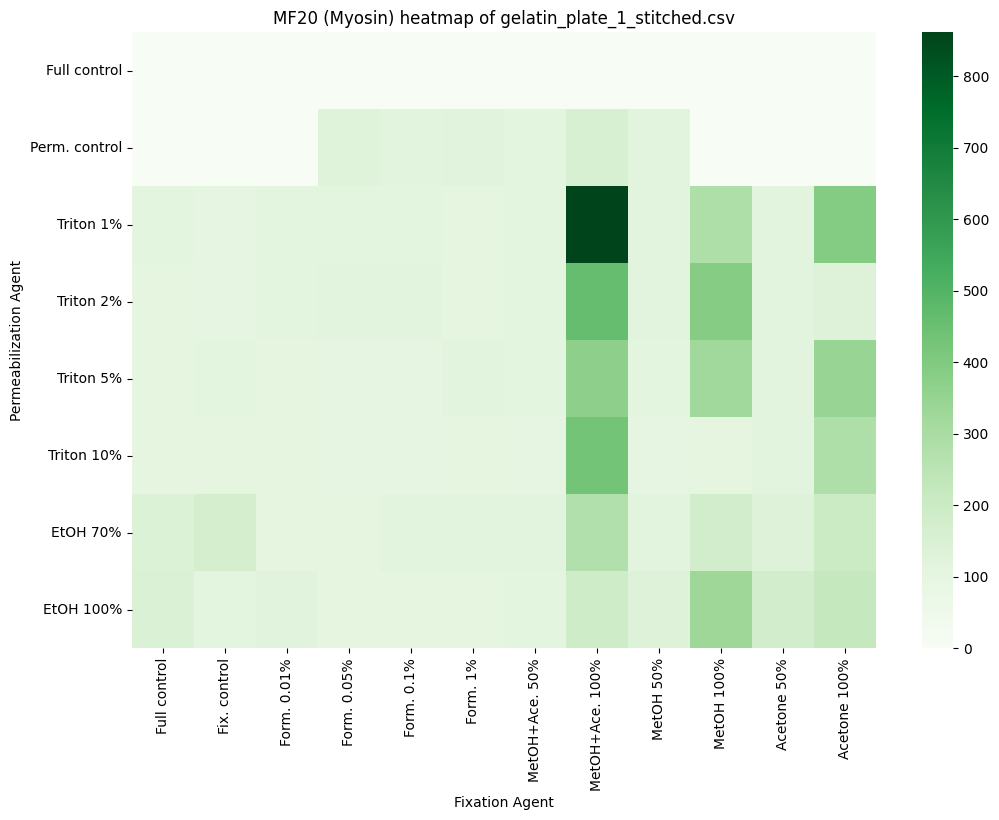

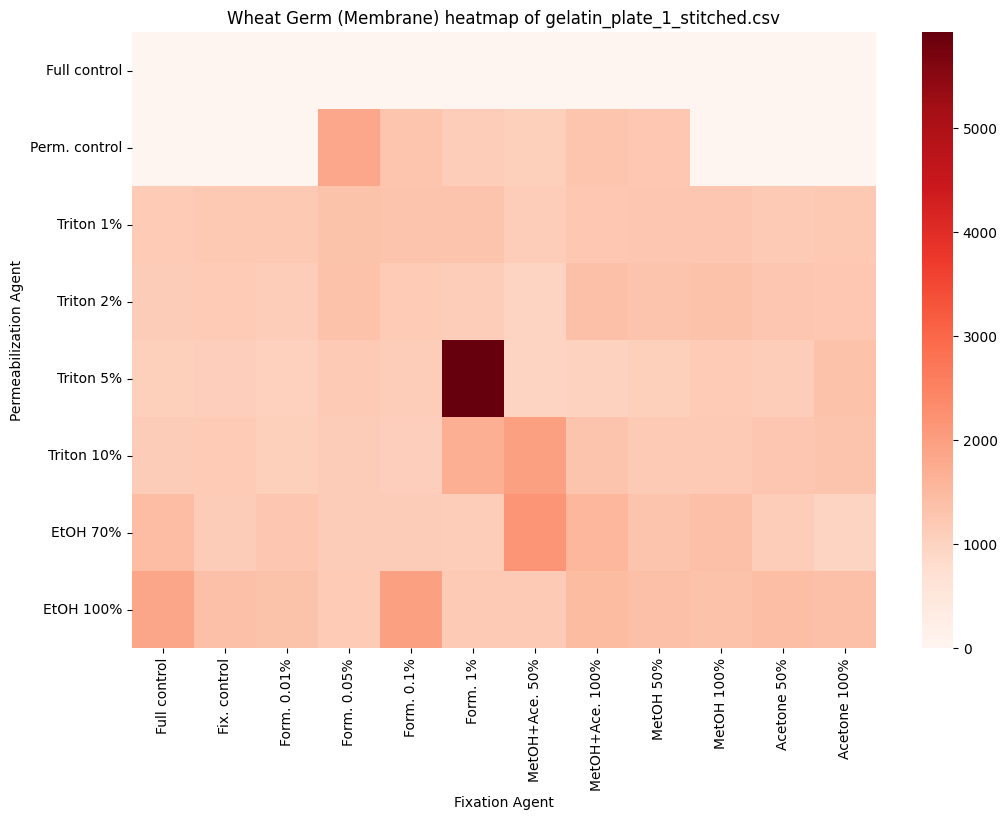

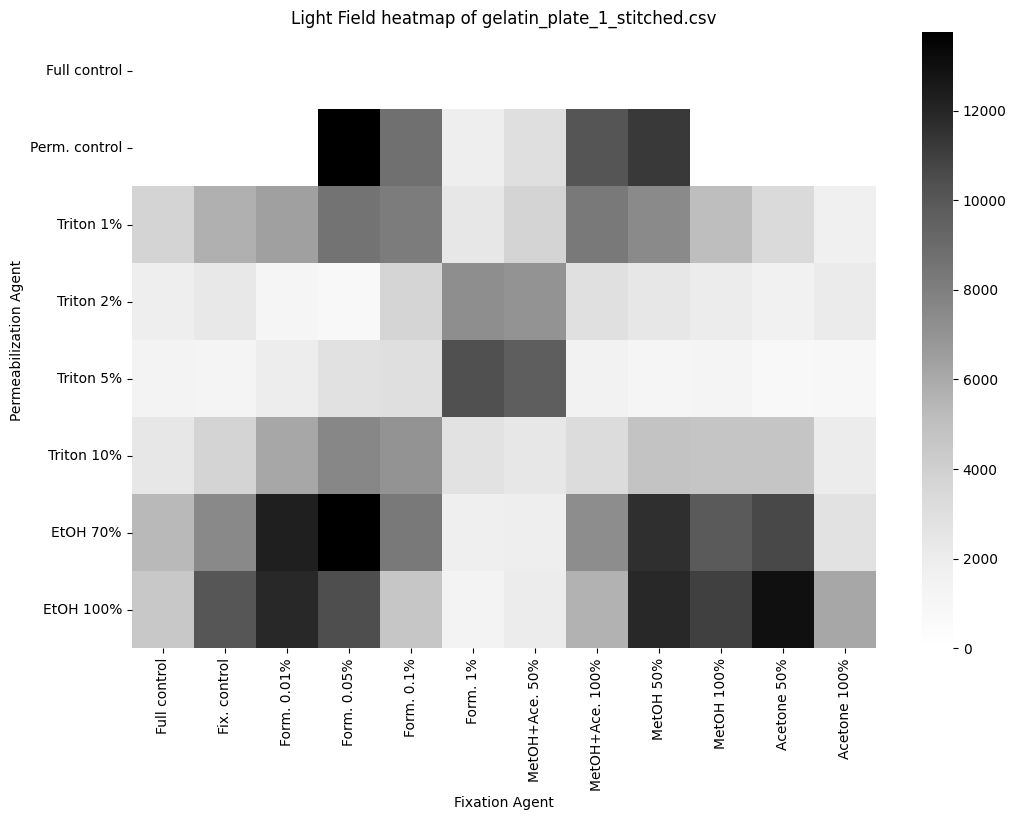

In [139]:
heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w525", "MF20 (Myosin)", "Greens"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w597", "Wheat Germ (Membrane)", "Reds"),
)

heatmap_of_experiment(
    experiment_results="gelatin_plate_1_stitched.csv",
    color_channel=("w-50", "Light Field", "Greys"),
)


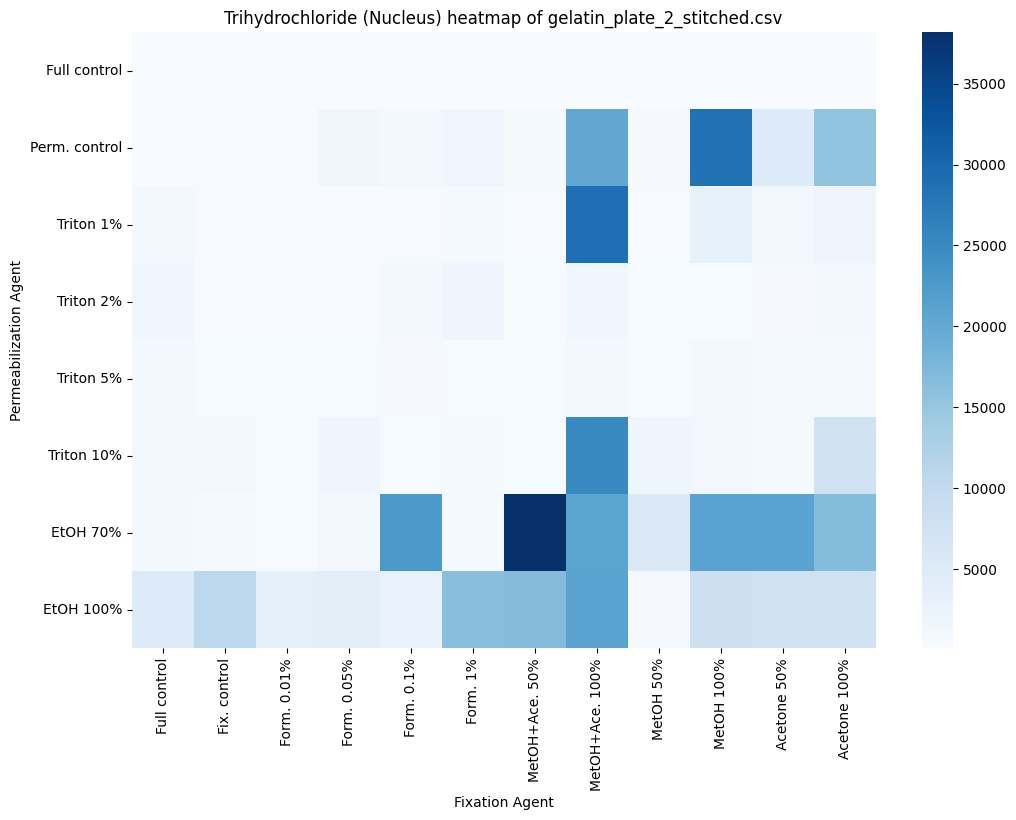

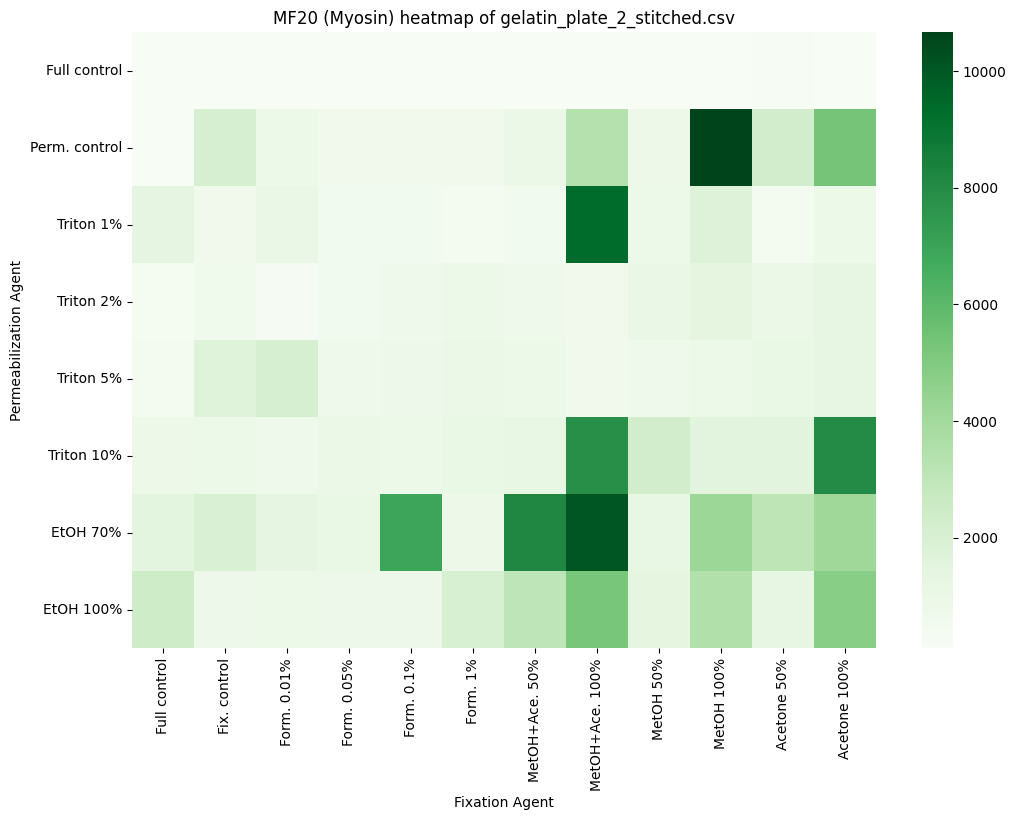

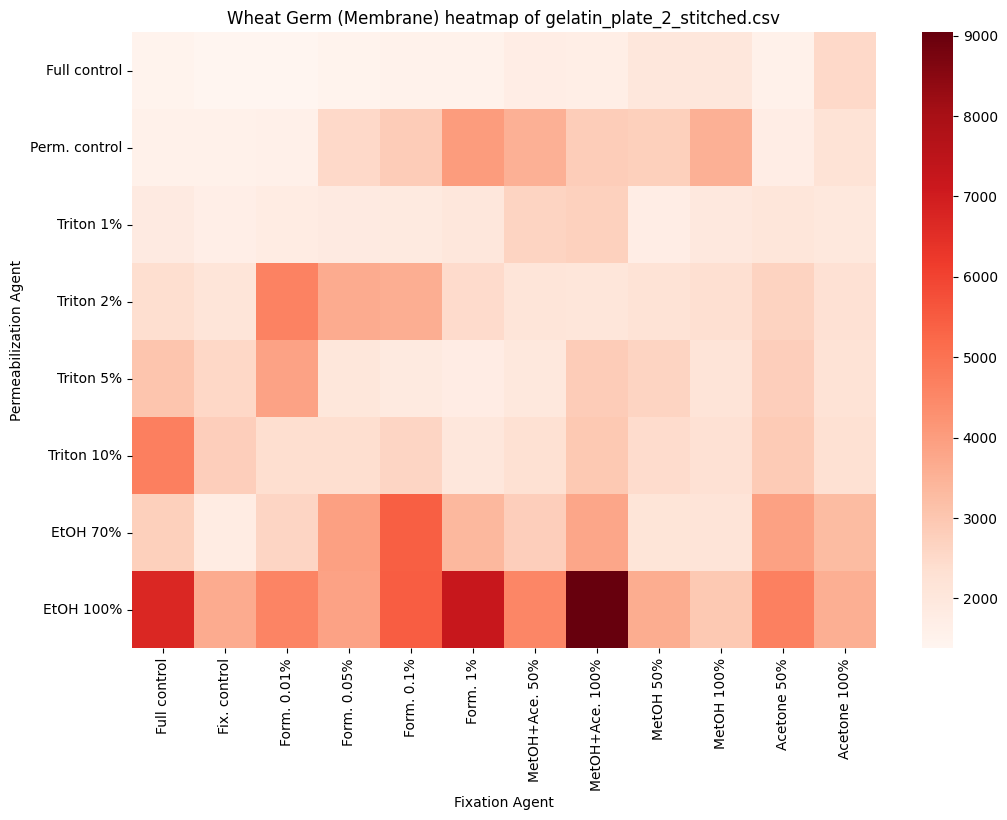

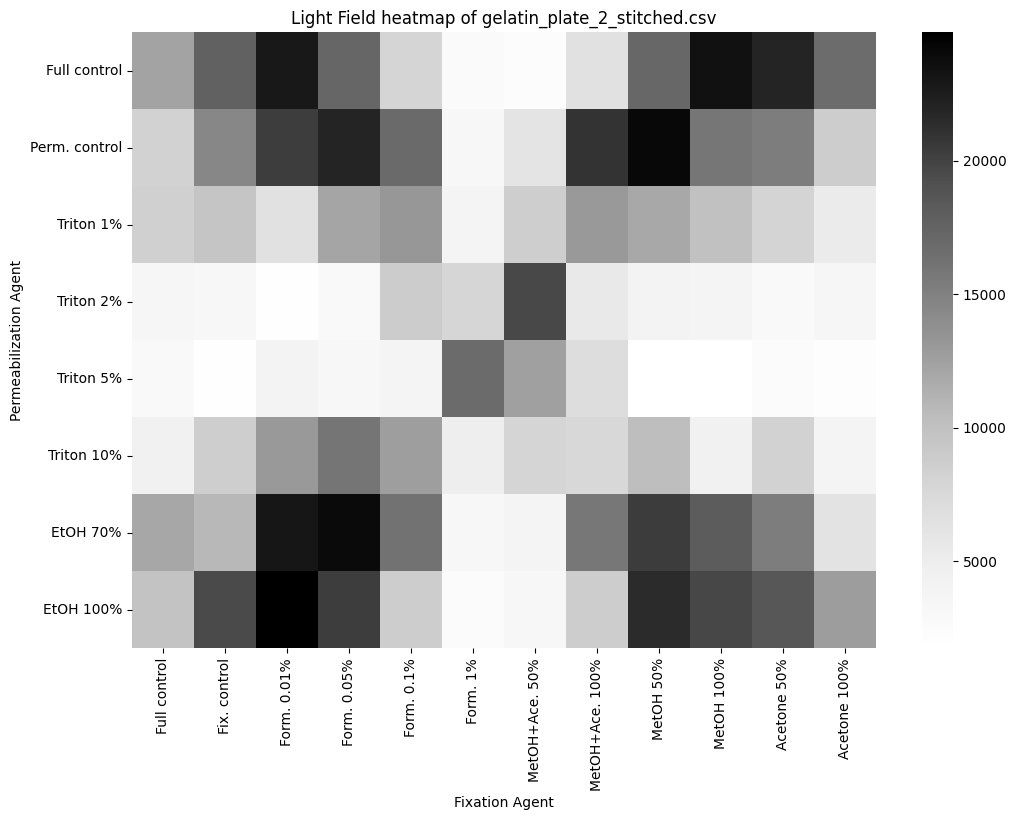

In [140]:
heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w525", "MF20 (Myosin)", "Greens"),
)
heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w597", "Wheat Germ (Membrane)", "Reds"),
)

heatmap_of_experiment(
    experiment_results="gelatin_plate_2_stitched.csv",
    color_channel=("w-50", "Light Field", "Greys"),
)


# Can we viz the actual cells?

In [18]:
import numpy as np
from skimage import io
import pdb


def generate_image(filename, norm_factor=None, debug=False):
    # Normalize by a set value if norm_factor is set, otherwise normalize per cell
    norm = (
        lambda img: img * norm_factor
        if norm_factor is not None
        else img / (img.max() if img.max() > 0 else 1)
    )
    img = io.imread(filename)
    combined_img = np.zeros((img.shape[0], img.shape[1], 3))
    if "w435" in filename:
        combined_img[:, :, 2] = norm(img)
    elif "w525" in filename:
        combined_img[:, :, 1] = norm(img)
    elif "w597" in filename:
        combined_img[:, :, 0] = norm(img)
    elif "w-50" in filename:
        combined_img[:, :, 0] = img / (img.max() if img.max() > 0 else 1)
        combined_img[:, :, 1] = img / (img.max() if img.max() > 0 else 1)
        combined_img[:, :, 2] = img / (img.max() if img.max() > 0 else 1)

    if debug:
        plt.imshow(combined_img)
        plt.show()
    return combined_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


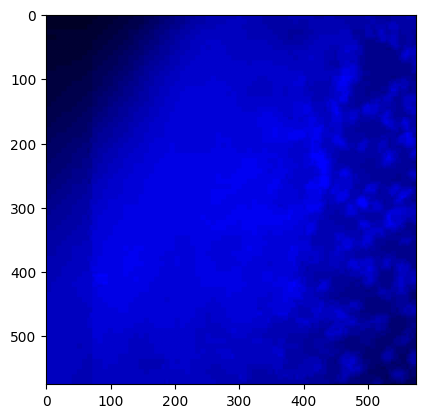

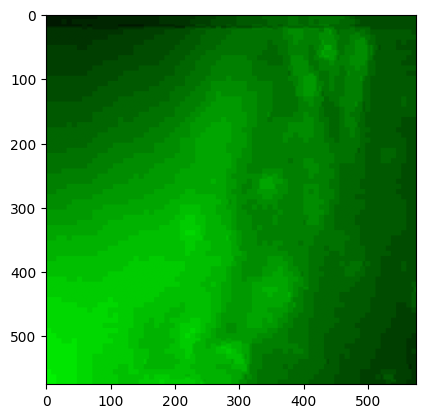

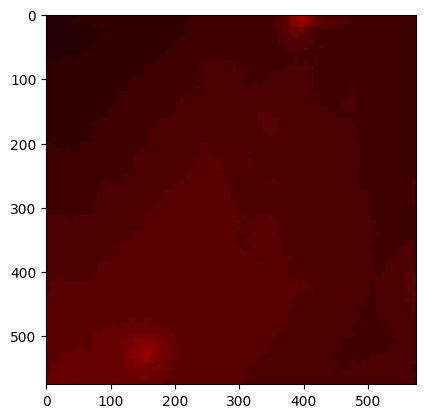

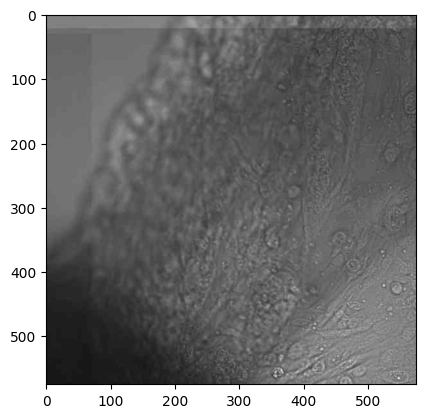

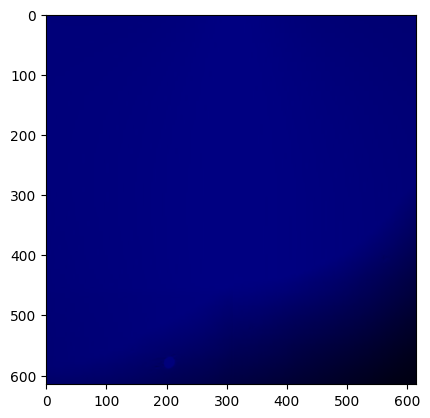

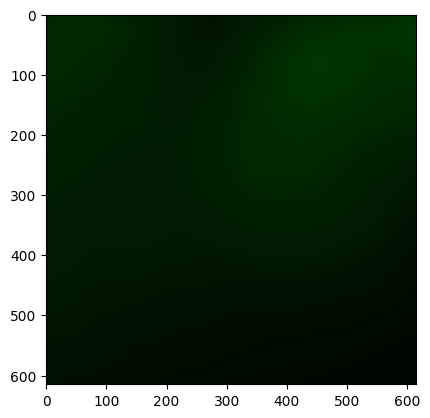

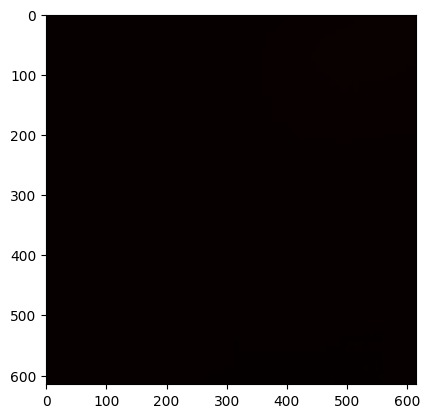

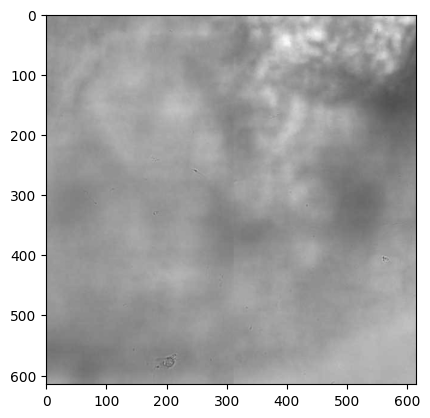

In [234]:
generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w435_reduced.jpg', norm_factor=0.05, debug=True)
# generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w525_reduced.jpg', norm_factor=0.05, debug=True)
# generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w597_reduced.jpg', norm_factor=0.05, debug=True)
# generate_image('gelatin_plate_1_stitched/C8_R3D_STC_w-50_reduced.jpg', norm_factor=0.05, debug=True)

# generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w435_reduced.jpg', norm_factor=0.002, debug=True)
# generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w525_reduced.jpg', norm_factor=0.002, debug=True)
# generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w597_reduced.jpg', norm_factor=0.002, debug=True)
# generate_image('gelatin_plate_2_stitched/H10_R3D_STC_w-50_reduced.jpg', norm_factor=0.002, debug=True)
# pass
# pass

In [13]:
color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues")
df = chicken_result_df
df = df[df["filename"].str.contains(color_channel[0])]
df['reduced_filename']

0               chicken/chicken_ethanol_reduced.jpg
3              chicken/chicken_methanol_reduced.jpg
6    chicken/chicken_methanol & acetone_reduced.jpg
9               chicken/chicken_acetone_reduced.jpg
Name: reduced_filename, dtype: object

In [20]:
def image_matrix_of_experiment(
    experiment_results="chicken.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
    norm_factor=None,
):
    df = pd.read_csv(experiment_results)
    df = df[df["filename"].str.contains(color_channel[0])]
    files = df['reduced_filename']
    
    plt.figure(figsize=(12, 3))
    fig, axes = plt.subplots(
        nrows=1,
        ncols=len(files),#df.shape[1],
        figsize=(24, 16),
        sharex=True,
        sharey=True,
    )
    for row_idx in range(len(files)):
        ax = axes[row_idx]
        img = generate_image(list(files)[row_idx], norm_factor=norm_factor)
        ax.imshow(img)

    fig.suptitle(f"{color_channel[1]} for {experiment_results}", fontsize=16)

    # Add y-labels
    for row_idx in range(df.shape[0]):
        ax = axes[row_idx]
        ax.set_xlabel(
            list(files)[row_idx],
            fontsize=12,
            rotation=0,
            labelpad=20,
        )


    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    # plt.subplots_adjust(top=0.9, bottom=0.1, left=0.25, right=0.3, hspace=0.1, wspace=0.1)

    plt.show()

<Figure size 1200x300 with 0 Axes>

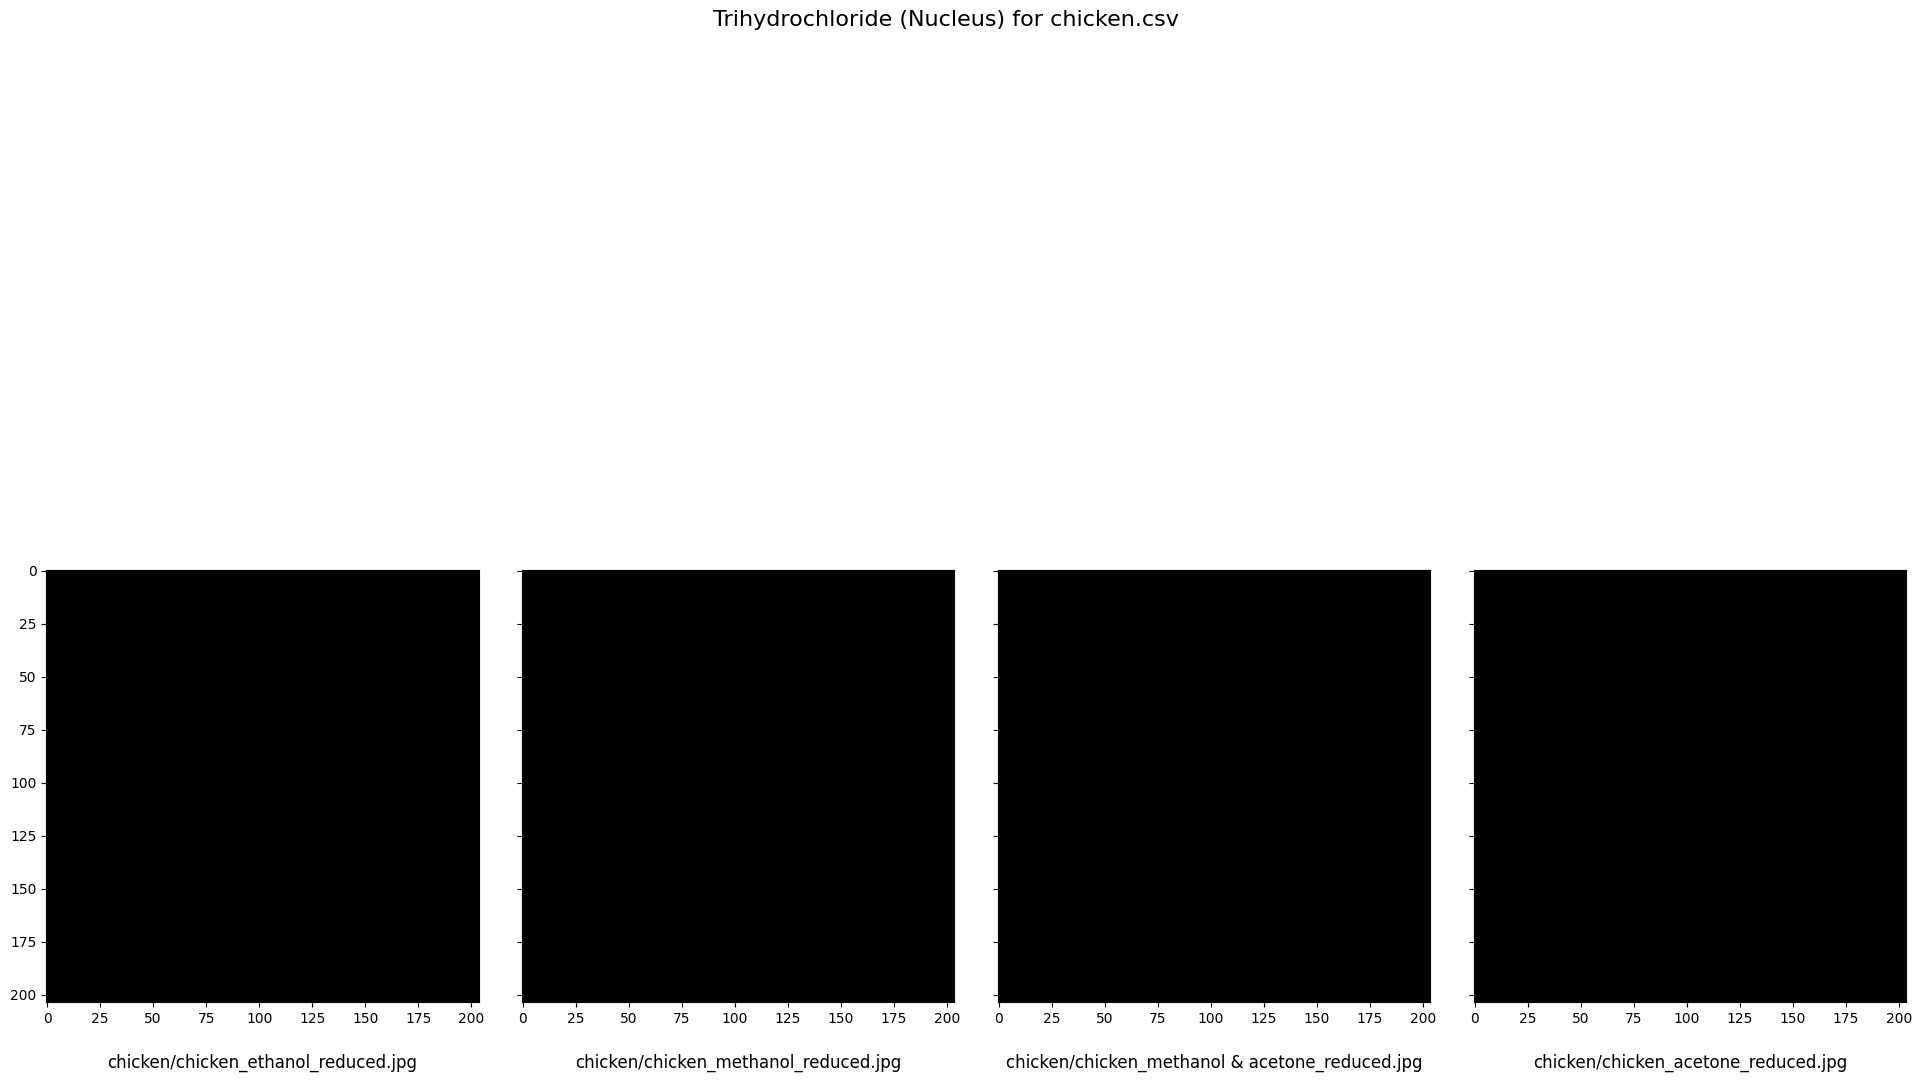

In [21]:
image_matrix_of_experiment(
    experiment_results="chicken.csv",
    color_channel=("w435", "Trihydrochloride (Nucleus)", "Blues"),
)

## Let's download the images generated and save cropped versions around the densest areas & create dataframes of mean, max, min 

In [3]:
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, transform

from skimage.morphology import disk
import pdb
import numpy as np


def find_densest_region(image_data, downsample_factor=10, debug=False):
    downsampled_data = transform.rescale(
        image_data, scale=1 / downsample_factor, anti_aliasing=False
    )

    if debug:
        plt.subplot(221)
        plt.imshow(downsampled_data)
        plt.title("Downsampled image")
        print("next, applying gaussian filter!")

    # Gaussian-filter the image
    filtered_data = filters.gaussian(downsampled_data, sigma=9)
    if debug:
        plt.subplot(222)
        plt.imshow(filtered_data)
        plt.title("Gaussian-filtered image")
        print("next, running morphological close operation!")

    # Perform a morphological close operation
    closed_data = morphology.closing(filtered_data, disk(31))
    if debug:
        plt.subplot(223)
        plt.imshow(closed_data)
        plt.title("Closed image")
        print("next, finding global maxima!")

    # Find the regions where local maxima occur
    # Find the global maximum
    global_max_position = np.unravel_index(np.argmax(closed_data), closed_data.shape)
    if debug:
        plt.subplot(224)
        plt.imshow(closed_data)
        plt.plot(
            global_max_position[1], global_max_position[0], "ro"
        )  # Plot the global maximum in red
        plt.title("Global Maximum Location")
        plt.show()

    return (
        global_max_position[0] * downsample_factor,
        global_max_position[1] * downsample_factor,
    )


def crop_image(
    image_data,
    global_max_position,
    save_file_name=None,
    crop_factor=5,
    downsample_factor=2,
    debug=False,
):
    global_max_position = (
        int(global_max_position[0] / downsample_factor),
        int(global_max_position[1] / downsample_factor),
    )
    image_data = transform.rescale(
        image_data, scale=1 / downsample_factor, anti_aliasing=False
    )

    # Crop around the global_max_position
    crop_size = int(min(image_data.shape) / crop_factor)
    crop_min_row = max(0, global_max_position[0] - crop_size // 2)
    crop_max_row = min(image_data.shape[0], crop_min_row + crop_size)
    crop_min_col = max(0, global_max_position[1] - crop_size // 2)
    crop_max_col = min(image_data.shape[1], crop_min_col + crop_size)

    # Ensure the cropped region has the desired dimensions
    cropped_region = np.zeros((crop_size, crop_size), dtype=image_data.dtype)
    cropped_region[
        : crop_max_row - crop_min_row, : crop_max_col - crop_min_col
    ] = image_data[crop_min_row:crop_max_row, crop_min_col:crop_max_col]
    if debug:
        plt.imshow(cropped_region)
        plt.title("Cropped image")
        plt.show()
    if save_file_name:
        io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))

    return cropped_region

In [4]:
import imageio

image = io.imread('tmp.tiff')
global_max_position = find_densest_region(image, debug=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yitongtseo/Documents/GitHub/ethical_necromancy/tmp.tiff'

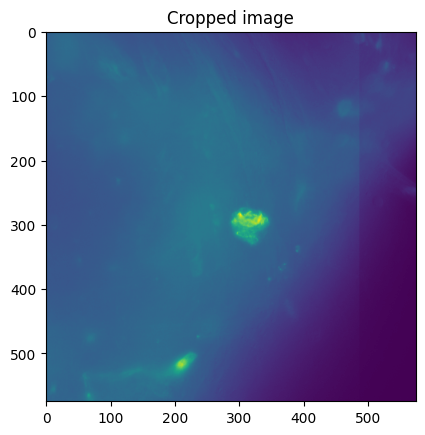

array([[0.05760163, 0.05607042, 0.05740139, ..., 0.02076074, 0.02036936,
        0.02064177],
       [0.0574247 , 0.05817943, 0.05756417, ..., 0.01898508, 0.01989592,
        0.02079407],
       [0.05702908, 0.0585534 , 0.05849201, ..., 0.02013154, 0.02045151,
        0.01912018],
       ...,
       [0.06025805, 0.06136237, 0.06115637, ..., 0.0018188 , 0.00197118,
        0.0018322 ],
       [0.06172999, 0.06064645, 0.06004606, ..., 0.00192344, 0.00192709,
        0.00169812],
       [0.06234949, 0.06223825, 0.06118775, ..., 0.00182213, 0.0018361 ,
        0.00174181]])

In [100]:
crop_image(image, global_max_position, crop_factor=5, debug=True)


In [9]:
import os
import pandas as pd
from smb.SMBConnection import SMBConnection
from skimage import io
import numpy as np
import pdb
import socket
import io as sysio
from tqdm import tqdm
import pdb

def connect_to_server(server_name, username, password):
    connection = SMBConnection(username, password, "", server_name, is_direct_tcp=True)
    server_ip = socket.gethostbyname(server_name)
    print(" are we connected? ", connection.connect(server_ip, 139))
    bytedata = "hello world".encode()
    print("To double check: ", connection.echo(bytedata, timeout=10))
    return connection


def process_tiff_images(
    remote_folder,
    connection,
    experiment="chicken",
    experiments={
        "chicken_ethanol_1_R3D_TIFFS": "ethanol",
        "chicken_meth_7_P1_R3D_TIFFS": "methanol",
        "chicken_meth_ace_2_R3D_TIFFS": "methanol & acetone",
        "chicken_meth_acetone_4_P1_R3D_TIFFS": "acetone",
    },
    path="/Data/YitongTseo/20231113_frog_chicken_fix_perm_exp1/",
    color_channels=["435", "-50", "525"],  # blue, lightfield, green
    tmp_file="tmp",
):
    if not os.path.exists(experiment):
        os.mkdir(experiment)
    data = []
    # for file in connection.listPath(remote_folder, os.path.join(path, experiment)):
    #     filename = file.filename
    #     pdb.set_trace()
    #     if filename.endswith(".tiff") or filename.endswith(".tif"):

    for filename_stem, label in experiments.items():
            position = (None, None)  # Set by the DAPI channel
            for color_channel in color_channels:
                try:
                    filename = filename_stem[:-6] + "_w" + color_channel + ".tif"
                    print(filename)
                    remote_path = os.path.join(path, filename_stem, filename)
                    with open(tmp_file, "wb") as local_file:
                        connection.retrieveFile(remote_folder, remote_path, local_file)

                    image = io.imread(tmp_file)
                    if color_channel == "435":
                        # set the window of interest based off of blue DAPI stain
                        print("Retrieving densest region of cells baesd on DAPI image!")
                        position = find_densest_region(image, debug=False)
                        print("Done retrieving densest region of cells!")

                    assert position[0] is not None and position[1] is not None
                    reduced_filename = os.path.join(
                        experiment, f"{experiment}_{label}_reduced.jpg"
                    )
                    crop_image(image, position, save_file_name=reduced_filename)

                    data.append(
                        {
                            "filename": filename,
                            "reduced_filename": reduced_filename,
                            "pixel_mean": np.mean(image),
                            "pixel_min": np.min(image),
                            "pixel_max": np.max(image),
                        }
                    )
                except:
                    continue
            pd.DataFrame(data).to_csv(experiment + ".csv")
    return pd.DataFrame(data)

In [10]:
server_name = "bmc-lab6.mit.edu" # smb://bmc-lab6.mit.edu/microscopy
username = "yitongt@mit.edu"
password = "Dapangnekos3!!"
remote_folder = "microscopy"  # Adjust this based on your folder structure in the server
# path = "/Data/YitongTseo/20231107_Fix_Perm_Experiment/gelatin_plate_1_stitched/"
path = "/Data/YitongTseo/20231113_frog_chicken_fix_perm_exp1/"

connection = connect_to_server(server_name, username, password)
result_df = process_tiff_images(remote_folder, connection, experiment="chicken")
# result_df = process_tiff_images(remote_folder, connection, experiment="gelatin_plate_2_stitched")

chicken_result_df = process_tiff_images(
    remote_folder,
    connection,
    experiment="chicken",
    experiments={
        "chicken_ethanol_1_R3D_TIFFS": "ethanol",
        "chicken_meth_7_P1_R3D_TIFFS": "methanol",
        "chicken_meth_ace_2_R3D_TIFFS": "methanol & acetone",
        "chicken_meth_acetone_4_P1_R3D_TIFFS": "acetone",
    },
    path="/Data/YitongTseo/20231113_frog_chicken_fix_perm_exp1/",
    color_channels=["435", "-50", "525"],  # blue, lightfield, green
    tmp_file="tmp",
)
print(chicken_result_df)
frog_result_df = process_tiff_images(
    remote_folder,
    connection,
    experiment="frog",
    experiments={
        "frog_acetone_3_R3D_TIFFS": "acetone",
        "frog_ethanol_4_R3D_TIFFS": "ethanol",
        "frog_meth_1_R3D_TIFFS": "methanol",
        "frog_met_acetone_1_R3D_TIFFS": "methanol & acetone",
    },
    path="/Data/YitongTseo/20231113_frog_chicken_fix_perm_exp1/",
    color_channels=["435", "-50", "525"],  # blue, lightfield, green
    tmp_file="tmp",
)

# Now 'result_df' contains the computed features for each TIFF image
print(frog_result_df)

connection.close()



 are we connected?  True
To double check:  b'hello world'
chicken_ethanol_1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_ethanol_1_R3D_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: chicken/chicken_ethanol_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


chicken_ethanol_1_R3D_w525.tif
chicken_meth_7_P1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_meth_7_P1_R3D_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: chicken/chicken_methanol_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


chicken_meth_7_P1_R3D_w525.tif
chicken_meth_ace_2_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_meth_ace_2_R3D_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: chicken/chicken_methanol & acetone_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


chicken_meth_ace_2_R3D_w525.tif
chicken_meth_acetone_4_P1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_meth_acetone_4_P1_R3D_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: chicken/chicken_acetone_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


chicken_meth_acetone_4_P1_R3D_w525.tif
chicken_ethanol_1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_ethanol_1_R3D_w-50.tif
chicken_ethanol_1_R3D_w525.tif
chicken_meth_7_P1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_meth_7_P1_R3D_w-50.tif
chicken_meth_7_P1_R3D_w525.tif
chicken_meth_ace_2_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_meth_ace_2_R3D_w-50.tif
chicken_meth_ace_2_R3D_w525.tif
chicken_meth_acetone_4_P1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
chicken_meth_acetone_4_P1_R3D_w-50.tif
chicken_meth_acetone_4_P1_R3D_w525.tif
                                  filename  \
0           chicken_ethanol_1_R3D_w435.tif   
1           chicken_ethanol_1_R3D_w-50.tif   
2           chicken_ethanol_1_R3D_w5

/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: frog/frog_acetone_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


frog_acetone_3_R3D_w525.tif
frog_ethanol_4_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
frog_ethanol_4_R3D_w-50.tif
frog_ethanol_4_R3D_w525.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: frog/frog_ethanol_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


frog_meth_1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
frog_meth_1_R3D_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: frog/frog_methanol_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


frog_meth_1_R3D_w525.tif
frog_met_acetone_1_R3D_w435.tif
Retrieving densest region of cells baesd on DAPI image!
Done retrieving densest region of cells!
frog_met_acetone_1_R3D_w-50.tif


/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_81086/3875322643.py:87: UserWarning: frog/frog_methanol & acetone_reduced.jpg is a low contrast image
  io.imsave(save_file_name, (255 * cropped_region).astype(np.uint8))


frog_met_acetone_1_R3D_w525.tif
                           filename                          reduced_filename  \
0       frog_acetone_3_R3D_w435.tif             frog/frog_acetone_reduced.jpg   
1       frog_acetone_3_R3D_w-50.tif             frog/frog_acetone_reduced.jpg   
2       frog_acetone_3_R3D_w525.tif             frog/frog_acetone_reduced.jpg   
3       frog_ethanol_4_R3D_w435.tif             frog/frog_ethanol_reduced.jpg   
4       frog_ethanol_4_R3D_w-50.tif             frog/frog_ethanol_reduced.jpg   
5       frog_ethanol_4_R3D_w525.tif             frog/frog_ethanol_reduced.jpg   
6          frog_meth_1_R3D_w435.tif            frog/frog_methanol_reduced.jpg   
7          frog_meth_1_R3D_w-50.tif            frog/frog_methanol_reduced.jpg   
8          frog_meth_1_R3D_w525.tif            frog/frog_methanol_reduced.jpg   
9   frog_met_acetone_1_R3D_w435.tif  frog/frog_methanol & acetone_reduced.jpg   
10  frog_met_acetone_1_R3D_w-50.tif  frog/frog_methanol & acetone_reduced.jpg